In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # for plot visualization

In [3]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV, LogisticRegression, LogisticRegressionCV

In [4]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import re

import warnings
# ignoring all the warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [6]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [7]:
import warnings
warnings.filterwarnings("ignore")
from python_utils import *

In [8]:
df = pd.read_csv('USA_Subnational_2_biomass_loss.csv')

In [9]:
df.head()

,country,subnational1,subnational2,threshold,area_ha,extent_2000_ha,extent_2010_ha,abg_biomass_stock_2000_Mg,avg_biomass_per_ha_Mg
0,United States,Alabama,Autauga,10,156174,109666,103665,11313316,103
1,United States,Alabama,Autauga,15,156174,108202,102662,11279508,104
2,United States,Alabama,Autauga,20,156174,106621,100894,11231116,105
3,United States,Alabama,Autauga,25,156174,105337,100504,11192435,106
4,United States,Alabama,Autauga,30,156174,103485,96833,11131617,108


In [10]:
df.describe()

,threshold,area_ha,extent_2000_ha,extent_2010_ha,abg_biomass_stock_2000_Mg,avg_biomass_per_ha_Mg
count,22036.000000,2.203600e+04,2.203600e+04,2.203600e+04,2.203600e+04,22036.000000
mean,32.142857,3.008524e+05,8.718126e+04,8.333169e+04,1.148518e+07,107.308586
std,21.189619,9.561421e+05,3.991855e+05,3.998755e+05,3.483862e+07,58.358700
min,10.000000,5.120000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,15.000000,1.135688e+05,1.254675e+04,1.044925e+04,9.447972e+05,76.000000
50%,25.000000,1.636940e+05,4.628500e+04,4.172350e+04,4.822399e+06,105.000000
75%,50.000000,2.456135e+05,9.798425e+04,9.129625e+04,1.147594e+07,125.000000
max,75.000000,3.809014e+07,2.508261e+07,2.512306e+07,1.165555e+09,710.000000


In [11]:
df.dtypes

country                      object
subnational1                 object
subnational2                 object
threshold                     int64
area_ha                       int64
extent_2000_ha                int64
extent_2010_ha                int64
abg_biomass_stock_2000_Mg     int64
avg_biomass_per_ha_Mg         int64
dtype: object

In [12]:
df.isna().sum()

country                      0
subnational1                 0
subnational2                 0
threshold                    0
area_ha                      0
extent_2000_ha               0
extent_2010_ha               0
abg_biomass_stock_2000_Mg    0
avg_biomass_per_ha_Mg        0
dtype: int64

In [13]:
df.corr()

,threshold,area_ha,extent_2000_ha,extent_2010_ha,abg_biomass_stock_2000_Mg,avg_biomass_per_ha_Mg
threshold,1.000000e+00,1.343468e-18,-0.029620,-0.031791,-0.021251,0.161158
area_ha,1.343468e-18,1.000000e+00,0.758979,0.772867,0.508835,0.008593
extent_2000_ha,-2.962041e-02,7.589792e-01,1.000000,0.996886,0.708489,0.091392
extent_2010_ha,-3.179079e-02,7.728667e-01,0.996886,1.000000,0.700556,0.083269
abg_biomass_stock_2000_Mg,-2.125057e-02,5.088353e-01,0.708489,0.700556,1.000000,0.540193
avg_biomass_per_ha_Mg,1.611583e-01,8.593443e-03,0.091392,0.083269,0.540193,1.000000


In [14]:
corr_matrix = df.corr().abs()

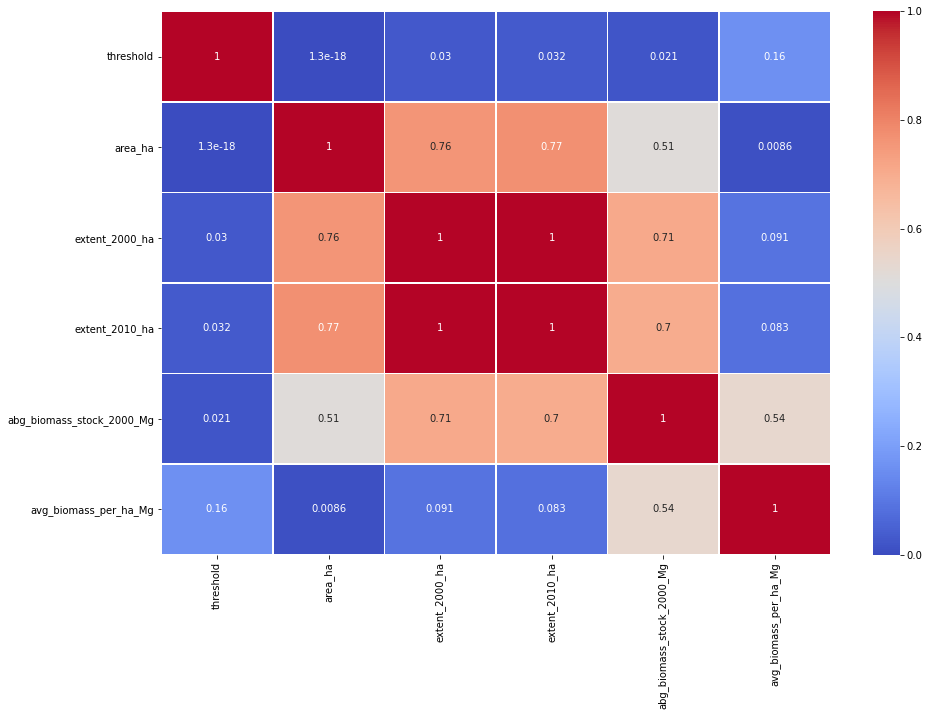

In [15]:
f, ax = plt.subplots(figsize=(15, 10)) 
heatmap = sns.heatmap(corr_matrix,linewidths = .5,cmap="coolwarm",annot=True)

In [16]:
df.shape

(22036, 9)

In [17]:
df.columns

Index(['country', 'subnational1', 'subnational2', 'threshold', 'area_ha',
       'extent_2000_ha', 'extent_2010_ha', 'abg_biomass_stock_2000_Mg',
       'avg_biomass_per_ha_Mg'],
      dtype='object')

In [18]:
cond = [
    (df['avg_biomass_per_ha_Mg'] >= 500),
    (df['avg_biomass_per_ha_Mg'] < 500) & (df['avg_biomass_per_ha_Mg'] >= 200),
    (df['avg_biomass_per_ha_Mg'] < 200)
    ]
val = ['High', 'Medium', 'Low']
df['avg_biomass_cat'] = np.select(cond,val)

In [19]:
df.head()

,country,subnational1,subnational2,threshold,area_ha,extent_2000_ha,extent_2010_ha,abg_biomass_stock_2000_Mg,avg_biomass_per_ha_Mg,avg_biomass_cat
0,United States,Alabama,Autauga,10,156174,109666,103665,11313316,103,Low
1,United States,Alabama,Autauga,15,156174,108202,102662,11279508,104,Low
2,United States,Alabama,Autauga,20,156174,106621,100894,11231116,105,Low
3,United States,Alabama,Autauga,25,156174,105337,100504,11192435,106,Low
4,United States,Alabama,Autauga,30,156174,103485,96833,11131617,108,Low


In [20]:
df1 = df.drop(labels=['country'], axis=1) 

In [21]:
df1.head()

,subnational1,subnational2,threshold,area_ha,extent_2000_ha,extent_2010_ha,abg_biomass_stock_2000_Mg,avg_biomass_per_ha_Mg,avg_biomass_cat
0,Alabama,Autauga,10,156174,109666,103665,11313316,103,Low
1,Alabama,Autauga,15,156174,108202,102662,11279508,104,Low
2,Alabama,Autauga,20,156174,106621,100894,11231116,105,Low
3,Alabama,Autauga,25,156174,105337,100504,11192435,106,Low
4,Alabama,Autauga,30,156174,103485,96833,11131617,108,Low


In [22]:
df.head()

,country,subnational1,subnational2,threshold,area_ha,extent_2000_ha,extent_2010_ha,abg_biomass_stock_2000_Mg,avg_biomass_per_ha_Mg,avg_biomass_cat
0,United States,Alabama,Autauga,10,156174,109666,103665,11313316,103,Low
1,United States,Alabama,Autauga,15,156174,108202,102662,11279508,104,Low
2,United States,Alabama,Autauga,20,156174,106621,100894,11231116,105,Low
3,United States,Alabama,Autauga,25,156174,105337,100504,11192435,106,Low
4,United States,Alabama,Autauga,30,156174,103485,96833,11131617,108,Low


In [23]:
data_onehot_encoded = df1.copy()
data_onehot_encoded = pd.get_dummies(data_onehot_encoded, columns=['subnational1'])
data = pd.get_dummies(data_onehot_encoded, columns=['subnational2'])

In [24]:
data.head()

,threshold,area_ha,extent_2000_ha,extent_2010_ha,abg_biomass_stock_2000_Mg,avg_biomass_per_ha_Mg,avg_biomass_cat,subnational1_Alabama,subnational1_Alaska,subnational1_Arizona,...,subnational2_Yoakum,subnational2_Yolo,subnational2_York,subnational2_Young,subnational2_Yuba,subnational2_Yukon-Koyukuk,subnational2_Yuma,subnational2_Zapata,subnational2_Zavala,subnational2_Ziebach
0,10,156174,109666,103665,11313316,103,Low,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,156174,108202,102662,11279508,104,Low,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20,156174,106621,100894,11231116,105,Low,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25,156174,105337,100504,11192435,106,Low,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30,156174,103485,96833,11131617,108,Low,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Low       21452
Medium      476
High        108
Name: avg_biomass_cat, dtype: int64

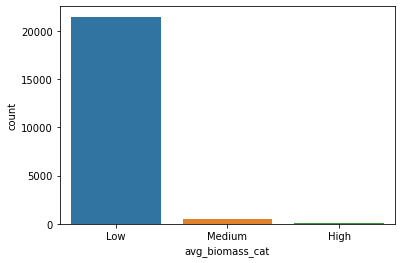

In [25]:
sns.countplot(x="avg_biomass_cat", data=data)
data.loc[:,'avg_biomass_cat'].value_counts()

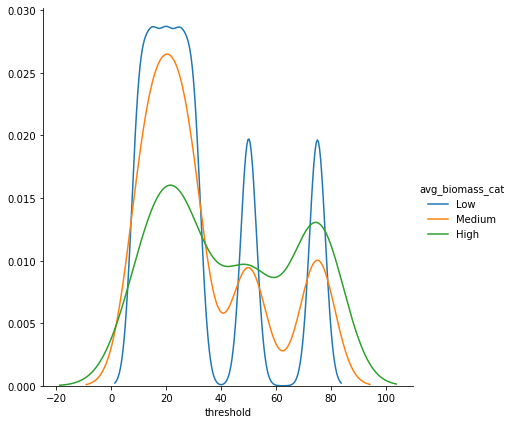

In [26]:
sns.FacetGrid(data, hue="avg_biomass_cat", size=6) \
   .map(sns.kdeplot, "threshold") \
   .add_legend()

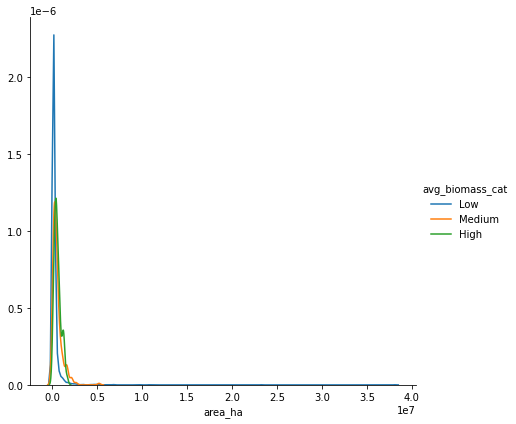

In [27]:
sns.FacetGrid(data, hue="avg_biomass_cat", size=6) \
   .map(sns.kdeplot, "area_ha") \
   .add_legend()

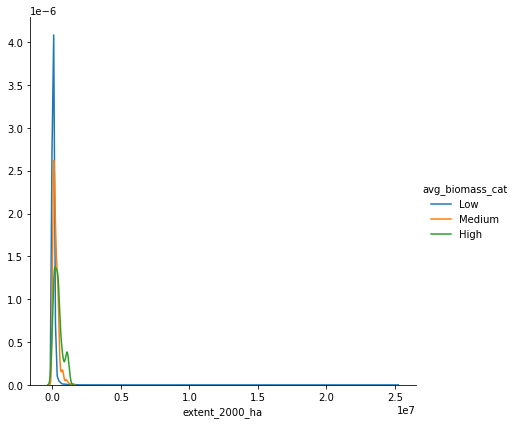

In [28]:
sns.FacetGrid(data, hue="avg_biomass_cat", size=6) \
   .map(sns.kdeplot, "extent_2000_ha") \
   .add_legend()

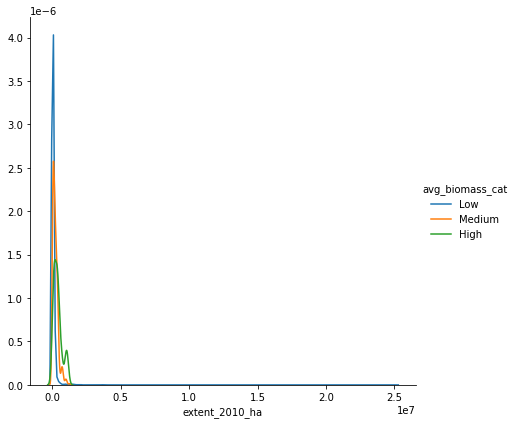

In [29]:
sns.FacetGrid(data, hue="avg_biomass_cat", size=6) \
   .map(sns.kdeplot, "extent_2010_ha") \
   .add_legend()

In [30]:
rand_state_ = 42
X_train, X_test, y_train, y_test = train_test_split(data.drop(['avg_biomass_cat'], axis=1), data.avg_biomass_cat, test_size=0.3, random_state=rand_state_)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [32]:
pipeline = Pipeline([('std_scalar', StandardScaler())])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [33]:
class EvaluateClassifier():
    def __init__(self):
        self.classifiers = {}

    def evaluate_model(self, modelName, train_predictions, test_predictions):
        self.classifiers[modelName] = {
            'train_score': accuracy_score(y_train, train_predictions),            
            'test_score': accuracy_score(y_test, test_predictions)
        }

    def fit_and_predict_using_RandomSearchCV(self, classifier, grid_params):
        random_cv_model = RandomizedSearchCV(estimator=classifier, param_distributions=grid_params, cv=10)
        random_cv_model.fit(X_train, y_train)
        self.evaluate_model(classifier.__class__.__name__, random_cv_model.predict(X_train), random_cv_model.predict(X_test))
        self.classifiers[classifier.__class__.__name__]['estimator'] = random_cv_model.estimator
        return self.classifiers[classifier.__class__.__name__]

    def voting_classifier(self, classifier_names):
        selected_classifiers = [(classifier_name, self.classifiers[classifier_name]['estimator']) for classifier_name in classifier_names]
        voting_classifier = VotingClassifier(estimators=selected_classifiers, voting='soft')
        voting_classifier.fit(X_train, y_train)
        self.evaluate_model(voting_classifier.__class__.__name__, voting_classifier.predict(X_train), voting_classifier.predict(X_test))
        self.classifiers[voting_classifier.__class__.__name__]['estimator'] = voting_classifier
        return self.classifiers[voting_classifier.__class__.__name__]

## Decision Tree

In [34]:
eval_classifier1 = EvaluateClassifier()

In [35]:
# Decision Tree
dt_grid_param = {
    'splitter': ['best', 'random'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4],
    'min_samples_split': [2, 3, 4],
    'max_features': ['sqrt'],
    'random_state': [rand_state_]
}

acc_dt = eval_classifier1.fit_and_predict_using_RandomSearchCV(DecisionTreeClassifier(), dt_grid_param)
acc_dt

{'train_score': 0.972836304700162,
 'test_score': 0.9780668582665255,
 'estimator': DecisionTreeClassifier()}

## Random Forest

In [36]:
eval_classifier2 = EvaluateClassifier()

In [37]:
rf_grid_param = {
    'n_estimators': [10, 30, 60, 90, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4],
    'min_samples_split': [2, 3, 4],
    'max_features': ['sqrt'],
    'random_state': [rand_state_]
}

acc_rf = eval_classifier2.fit_and_predict_using_RandomSearchCV(RandomForestClassifier(), rf_grid_param)
acc_rf

{'train_score': 0.9718638573743922,
 'test_score': 0.9773105430343367,
 'estimator': RandomForestClassifier()}

## Ridge Classifier

In [45]:
eval_classifier5 = EvaluateClassifier()

In [46]:
# RidgeClassifier
eval_classifier5.fit_and_predict_using_RandomSearchCV(RidgeClassifier(), {
    'alpha': [0.8, 1, 7, 13, 17],
    'random_state': [rand_state_]
})

{'train_score': 0.9952025931928687,
 'test_score': 0.9936469520496143,
 'estimator': RidgeClassifier()}

## Chossing random forest as the best classifier

In [49]:
import pickle
filename = 'USA_Subnational_2_biomass_loss.pkl'
pickle.dump(eval_classifier2, open(filename, 'wb'))